In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Read data and drop column 'Tertarik'

In [50]:
df = pd.read_csv("./kendaraan_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [51]:
# drop column tertarik and id
del df['Tertarik']
del df['id']
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


# Check Null value and replace null value with avg value or most frequent value

In [52]:
df.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [53]:
# replace missing value with avg value or most frequent value
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].fillna(df['Jenis_Kelamin'].mode()[0])
df['Umur'] = df['Umur'].fillna(df['Umur'].mean())
df['SIM'] = df['SIM'].fillna(df['SIM'].mode()[0])
df['Kode_Daerah'] = df['Kode_Daerah'].fillna(df['Kode_Daerah'].mode()[0])
df['Sudah_Asuransi'] = df['Sudah_Asuransi'].fillna(df['Sudah_Asuransi'].mode()[0])
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].fillna(df['Umur_Kendaraan'].mode()[0])
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].fillna(df['Kendaraan_Rusak'].mode()[0])
df['Premi'] = df['Premi'].fillna(df['Premi'].mean())
df['Kanal_Penjualan'] = df['Kanal_Penjualan'].fillna(df['Kanal_Penjualan'].mode()[0])
df['Lama_Berlangganan'] = df['Lama_Berlangganan'].fillna(df['Lama_Berlangganan'].mean())

In [54]:
df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

# Labeling Data

In [55]:
# get condition for labeling
def get_label(data) :
    conditions = []
    choices = []
    for idx, val in enumerate(data.unique()):
        conditions.append(data.str.contains(val))
        choices.append(idx)
    
    return np.select(conditions, choices)

In [56]:
# labeling data
print("Before", df["Jenis_Kelamin"].unique())
df["Jenis_Kelamin"] = get_label(df["Jenis_Kelamin"])
print("After", df["Jenis_Kelamin"].unique())

print("Before", df["Umur_Kendaraan"].unique())
df["Umur_Kendaraan"] = get_label(df["Umur_Kendaraan"])
print("After", df["Umur_Kendaraan"].unique())

print("Before", df["Kendaraan_Rusak"].unique())
df["Kendaraan_Rusak"] = get_label(df["Kendaraan_Rusak"])
print("After", df["Kendaraan_Rusak"].unique())


Before ['Wanita' 'Pria']
After [0 1]
Before ['< 1 Tahun' '> 2 Tahun' '1-2 Tahun']
After [0 1 2]
Before ['Tidak' 'Pernah']
After [0 1]


# Normalize data

In [57]:
# normalized_df=(df-df.min())/(df.max()-df.min())
df=(df-df.mean())/df.std()

# Feature Selection

<AxesSubplot:>

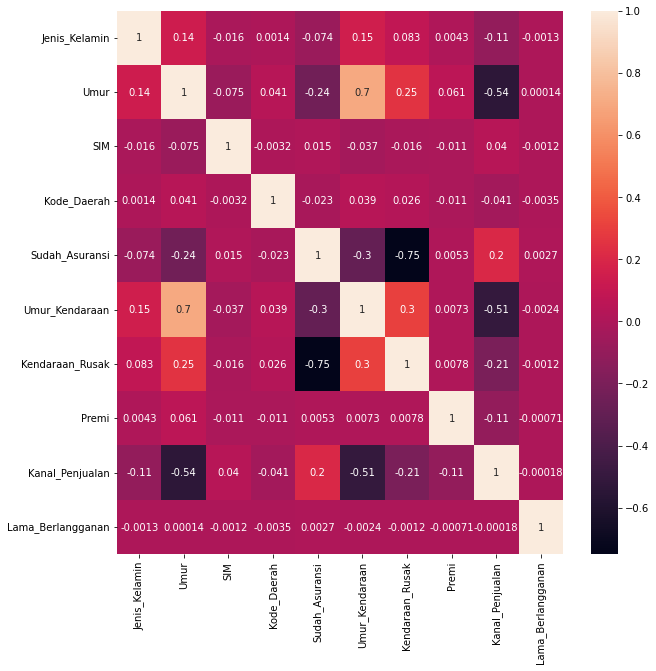

In [58]:
korelasi = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(korelasi, annot=True, ax=ax)

In [59]:
selected_data_col = ["Lama_Berlangganan", "Kanal_Penjualan"]
selected_data = df[selected_data_col].to_numpy()

# Class KMeans implement KMeans algorithm

In [60]:
class KMeans:
    def __init__(self, K, max_iteration=10, tolerance=0.0001,):
        self.K = K
        self.max_iteration = max_iteration
        self.tolerence = tolerance

    def _init_centroids(self, data):
        centroids = {}
        for i in range(self.K):
            centroids[i] = data[random.randint(0, len(data) - 1)]
        return centroids

    def _euclidean(self, x, y):
        return np.sqrt(sum((x - y)**2))

    def _init_clusters(self):
        clusters = {}
        for i in range(self.K):
            clusters[i] = []
        return clusters

    def _calculate_centroids(self, data):
        for val in self.clusters:
            if not self.clusters[val] :
                self.centroids[val] = self._init_centroids(data)[0]
            else :
                self.centroids[val] = np.mean(self.clusters[val], axis=0)

    def _calculate_distance(self, data):
        for val in data:
            distMinIndex = self.predict(val)
            self.clusters[distMinIndex].append(val)
    
    def fit(self, data):
        self.centroids = self._init_centroids(data)
        for i in range(self.max_iteration):
            old_centroids = self.centroids.copy()
            self.clusters = self._init_clusters()
            self._calculate_distance(data)
            self._calculate_centroids(data)

            optimized = True

            for i in self.centroids:
                current_centroid = self.centroids[i]
                old_centroid = old_centroids[i]
                if np.sum((current_centroid - old_centroid) / old_centroid * 100.0) > self.tolerence:
                    optimized = False
                    
            if optimized:
                break
            
    def predict(self, data):
        dist = []
        for c in self.centroids:
            dist.append(self._euclidean(data, self.centroids[c]))
        distMinIndex = dist.index(min(dist))
        return distMinIndex

# Main Program

In [61]:
k = 4
kmeans = KMeans(k)
kmeans.fit(selected_data)

In [62]:
# menampilkan list centroids
for i in range(k):
    print(f'Centroid {i+1} :', kmeans.centroids[i])

Centroid 1 : [1.19347954 0.56532722]
Centroid 2 : [-6.14798169e-04 -1.65680608e+00]
Centroid 3 : [0.01327492 0.57089916]
Centroid 4 : [-1.17390606  0.56690557]


# Visualisasi Clustering

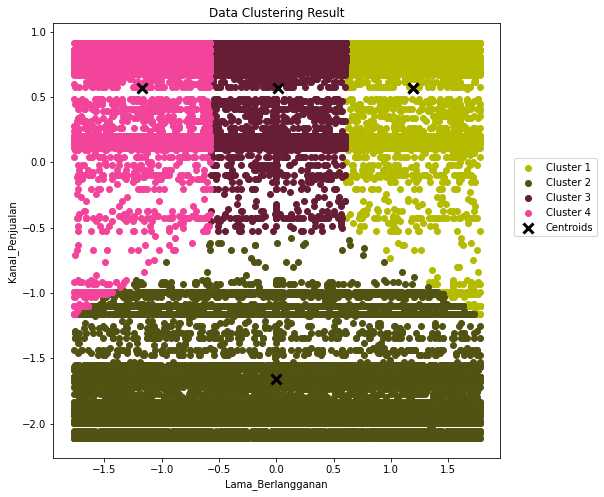

In [63]:
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(k)]

plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

for cluster in kmeans.clusters:
    data = np.array(kmeans.clusters[cluster])
    x, y = data.T
    plt.scatter(
        x,
        y,
        color=colors[cluster],
        label=f'Cluster {cluster + 1}'
    )

for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1],
                color='k', marker='x', s=100, linewidths=3)
plt.scatter(kmeans.centroids[0][0], kmeans.centroids[0][1],
                label="Centroids", color='k', marker='x', s=100, linewidths=3)


plt.xlabel(selected_data_col[0])
plt.ylabel(selected_data_col[1])
plt.legend(loc='best', bbox_to_anchor=(1.02,0.7))
plt.show()


# Elbow Mehtod

In [68]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans as sklearnKMeans
elbow = []

K = range(1, 7)

for i in K:
    # kmeans = sklearnKMeans(i)
    kmeans = KMeans(i, max_iteration=2)
    # kmeans.fit(selected_data)
    kmeans.fit(selected_data)
    # elbow.append(kmeans.inertia_)
    elbow.append(sum(np.min(cdist(selected_data, list(kmeans.centroids.values()),
                                        'euclidean'), axis=1)) / df[selected_data_col].shape[0])
print(elbow)

[1.3068001544546222, 0.9037493208134255, 0.9367369911324841, 0.8344319733510882, 0.5095400453925161, 0.39774789634628216]


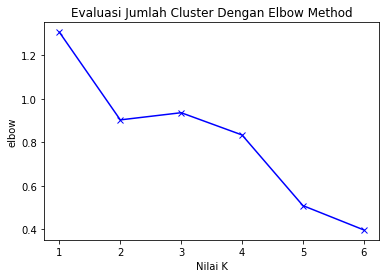

In [69]:
# Plot data
plt.plot(K, elbow, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('elbow')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()